In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200610_P200_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

/Users/chang/Desktop/SNIa/SN2020jgb/rv/absorption_line_vel.py:86: UserWarning: No flux uncertainty in the datafile!
  warnings.warn("No flux uncertainty in the datafile!")


# 20200610_P200

## Si II 6355

In [ ]:
Spec1.plot_line_region(5800, 6500)

In [ ]:
Spec1.add_line('SiII_6355', 5900, 6400, lines=[6371.359, 6347.103])

In [ ]:
Spec1.line['SiII_6355'].LS_estimator()

In [ ]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

In [ ]:
vel.plot_MCMC(sampler, 200)

## Ca II IRT

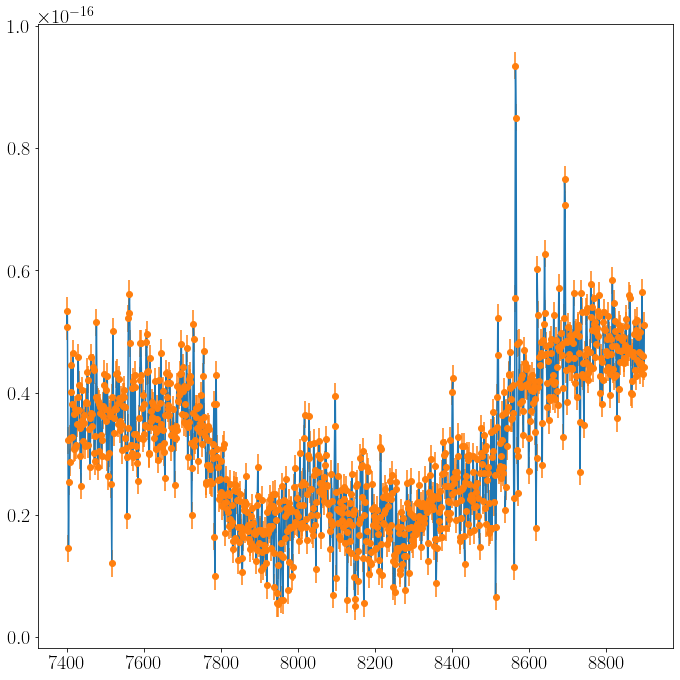

In [3]:
Spec1.plot_line_region(7400, 8900)

In [4]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

741 points within 7600.00 and 8700.00 angstroms.


/Users/chang/Desktop/SNIa/SN2020jgb/rv/absorption_line_vel.py:86: UserWarning: No flux uncertainty in the datafile!
  warnings.warn("No flux uncertainty in the datafile!")


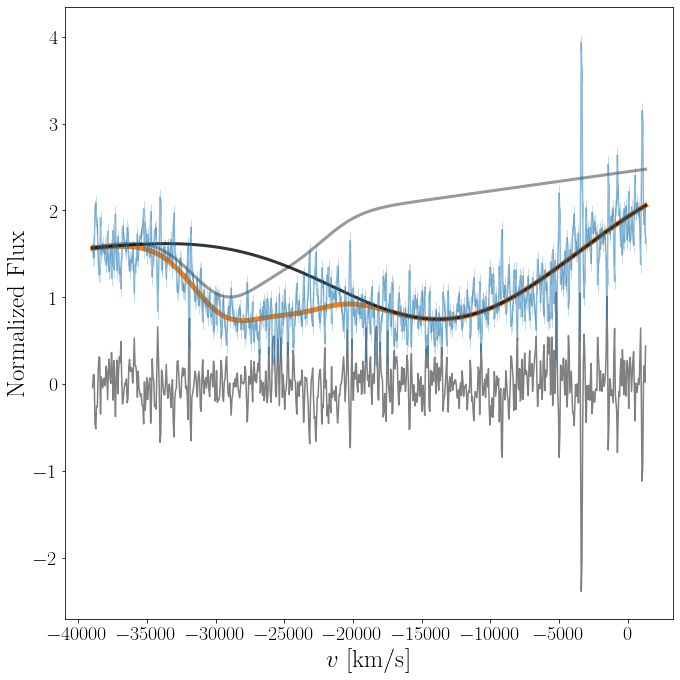

LS estimation:
Velocity pvf: -9200 km/s
Velocity hvf: -24236 km/s


In [5]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

  0%|          | 3/50000 [00:00<36:54, 22.57it/s]

MCMC results:
Velocity pvf: -9908 pm 178 km/s
Velocity hvf: -24176 pm 378 km/s


 10%|▉         | 4850/50000 [03:07<29:00, 25.93it/s]  


MCMC results:
Velocity pvf: -9853 pm 151 km/s
Velocity hvf: -24217 pm 213 km/s


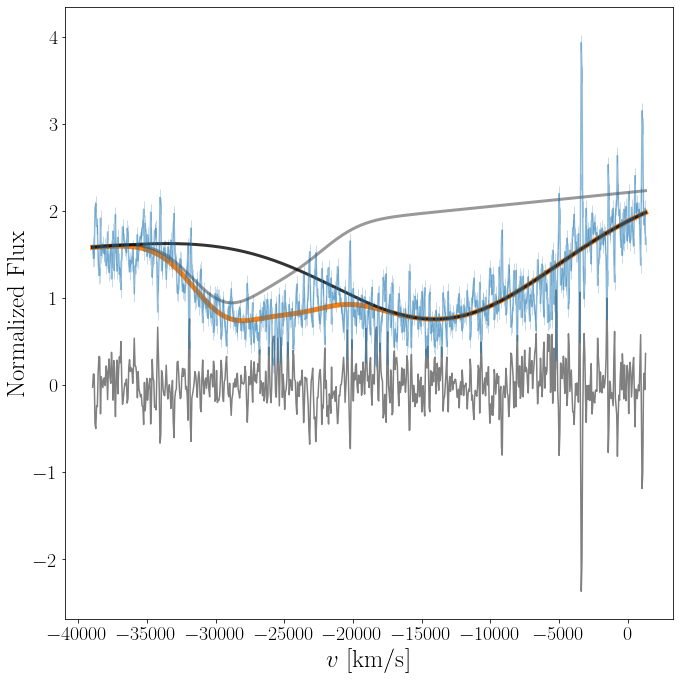

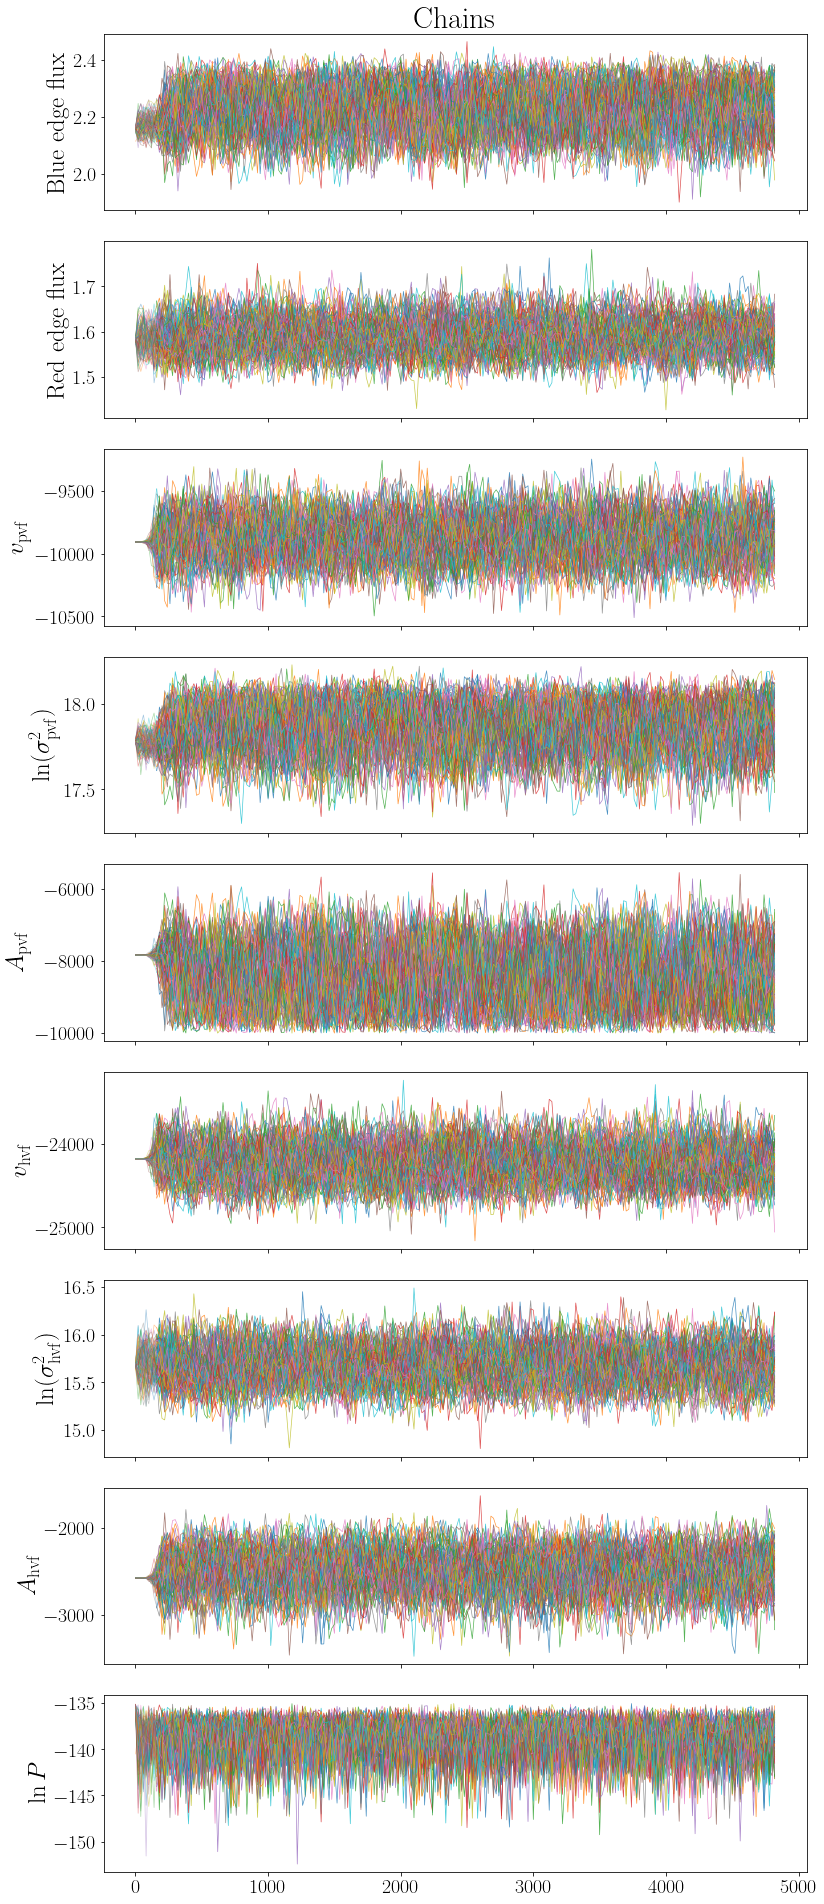

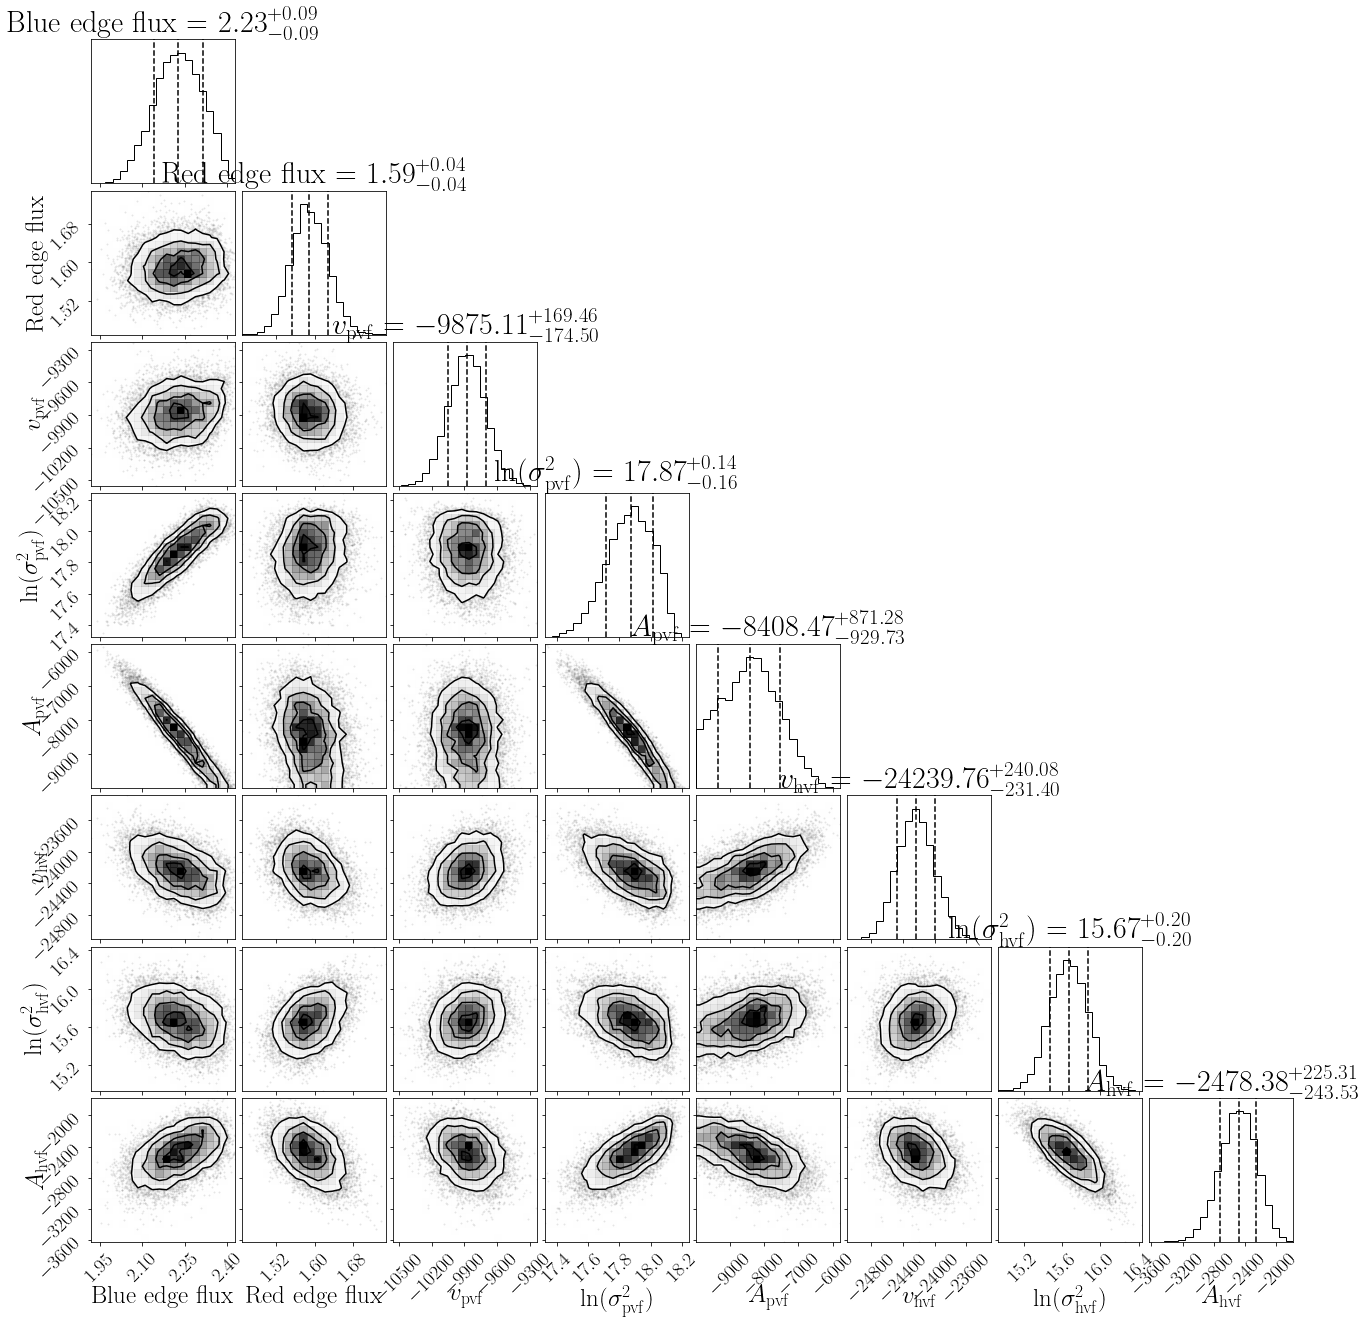

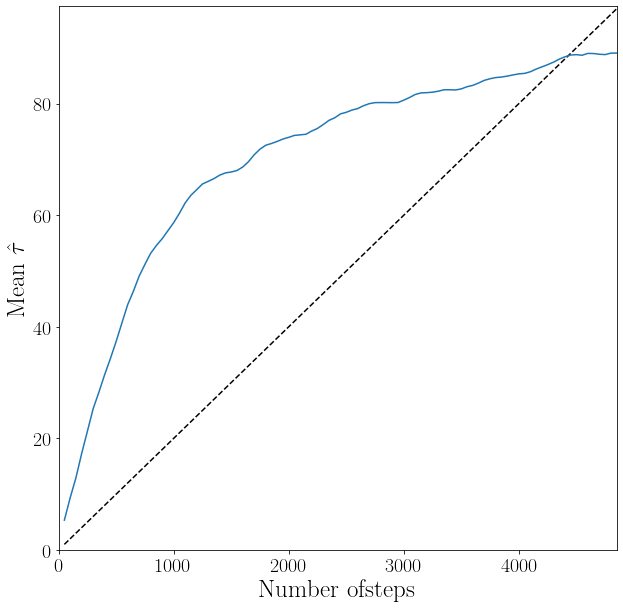

In [7]:
#mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
#var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
mu_pvf_prior = -10000
var_pvf_prior = 2e2**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[1, 1, -12000, 15, -1000, -25000, 15, -1000],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)